In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### A first look at the data

In [2]:
data = pd.read_csv('fetal_health.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
data.sample(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1702,137.0,0.006,0.002,0.005,0.002,0.0,0.000,57.0,1.4,0.0,...,69.0,178.0,3.0,1.0,148.0,143.0,149.0,43.0,1.0,1.0
308,141.0,0.000,0.007,0.000,0.000,0.0,0.000,71.0,0.4,67.0,...,69.0,147.0,2.0,0.0,144.0,142.0,144.0,2.0,1.0,2.0
2037,128.0,0.000,0.002,0.007,0.005,0.0,0.002,66.0,2.7,0.0,...,63.0,192.0,4.0,0.0,105.0,89.0,112.0,21.0,0.0,3.0
1899,139.0,0.009,0.001,0.008,0.006,0.0,0.000,50.0,1.4,0.0,...,76.0,178.0,8.0,0.0,162.0,142.0,147.0,71.0,1.0,1.0
52,156.0,0.000,0.000,0.011,0.008,0.0,0.001,34.0,5.4,0.0,...,50.0,200.0,8.0,0.0,117.0,131.0,136.0,108.0,0.0,2.0


In [5]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


**The table has 21 columns that contain data of type 'float64'. The data has no missing or unknown values (null values).**

### Verifying the distribution of the data

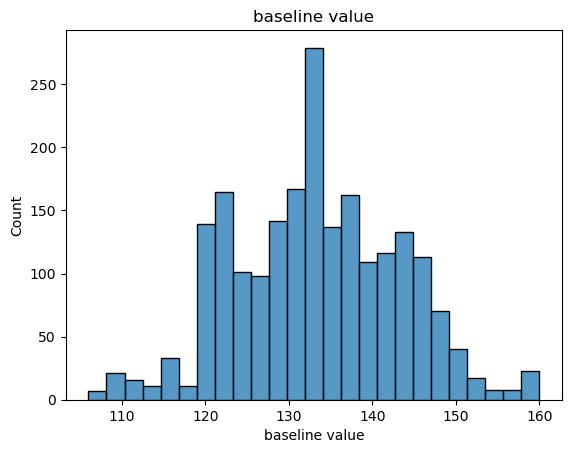

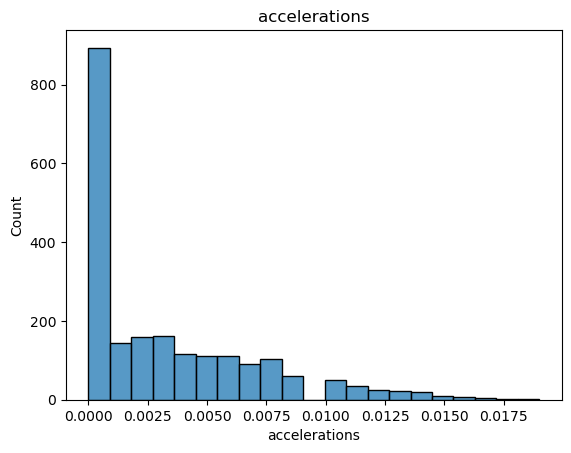

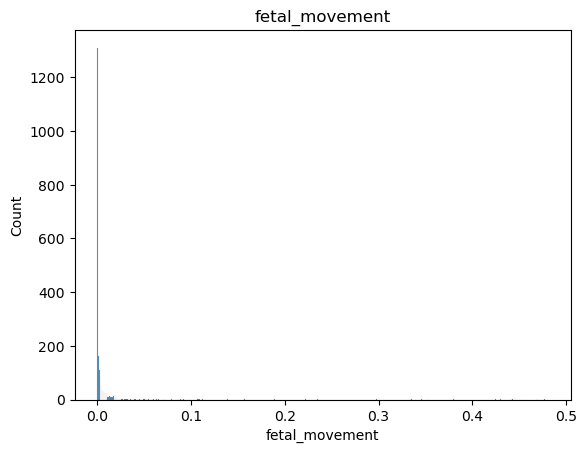

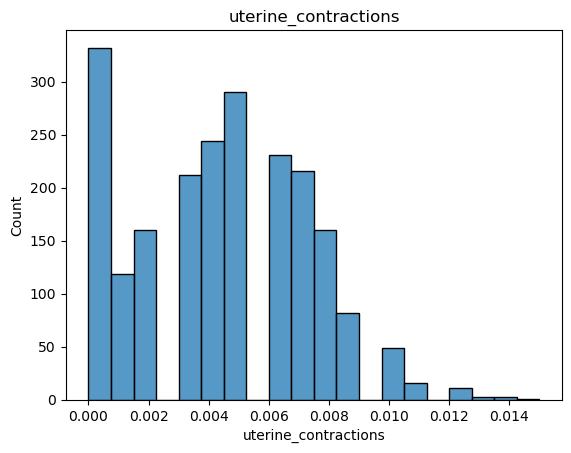

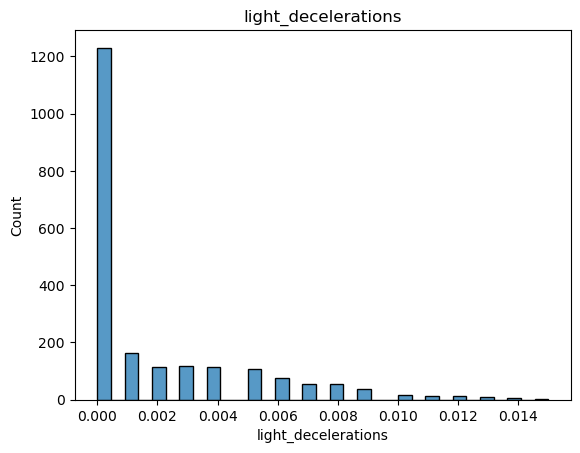

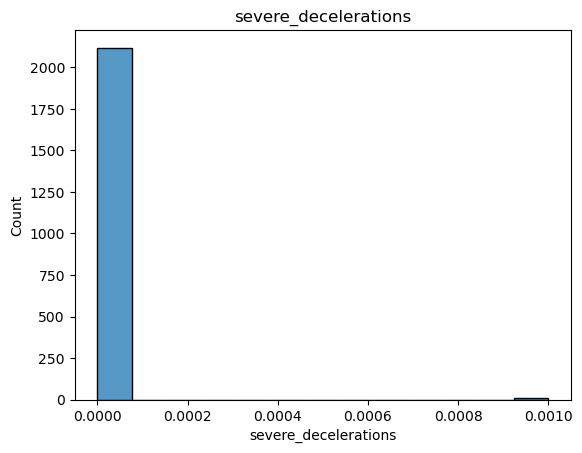

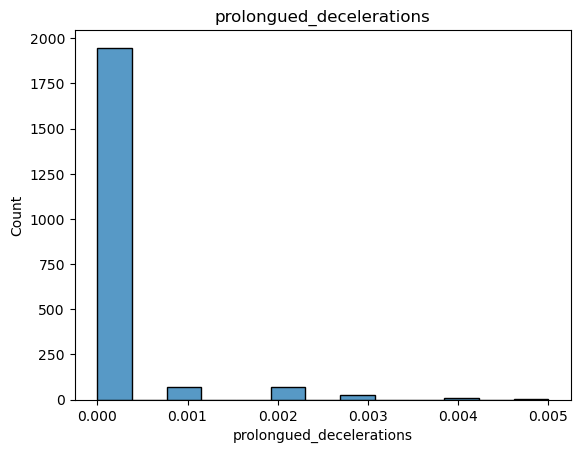

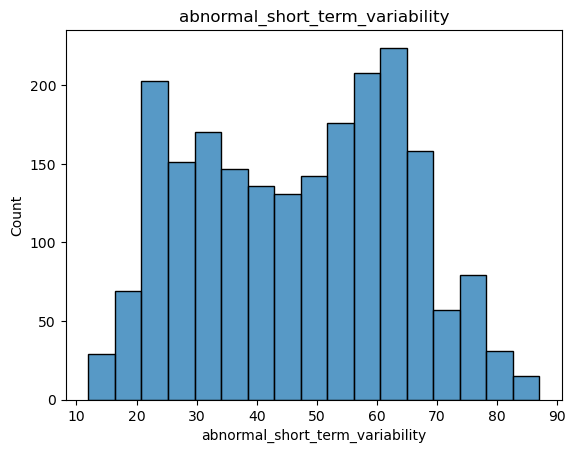

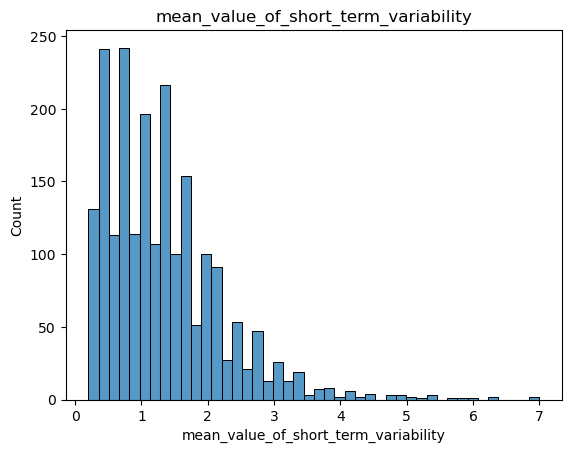

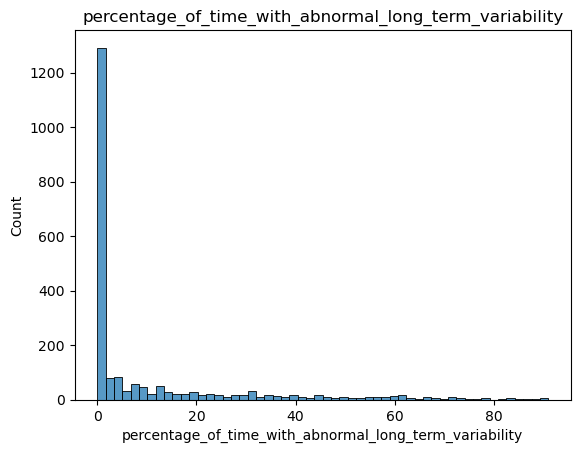

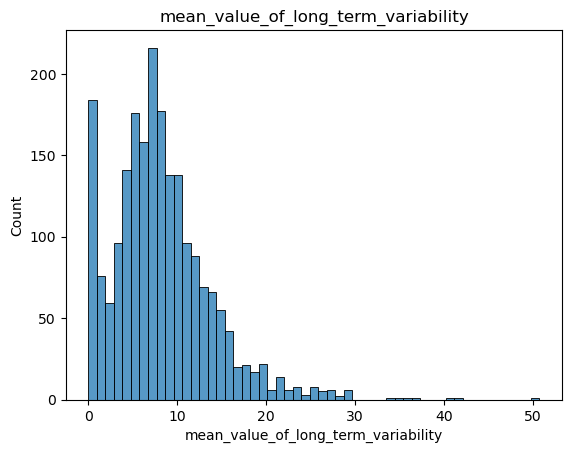

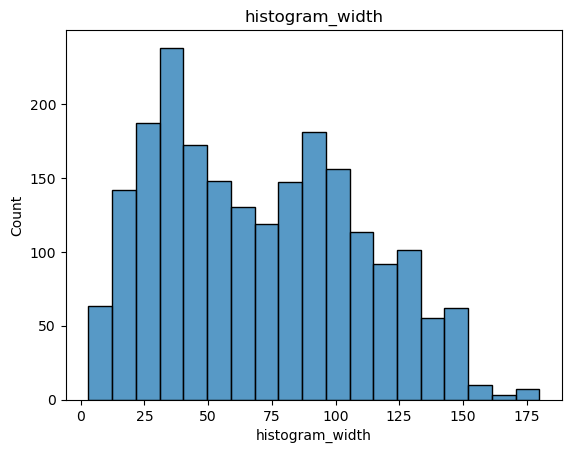

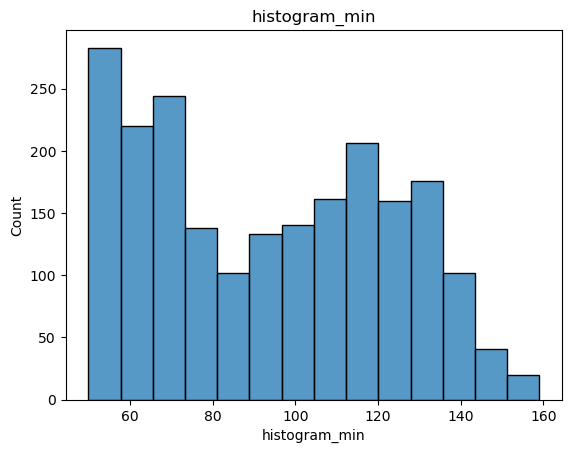

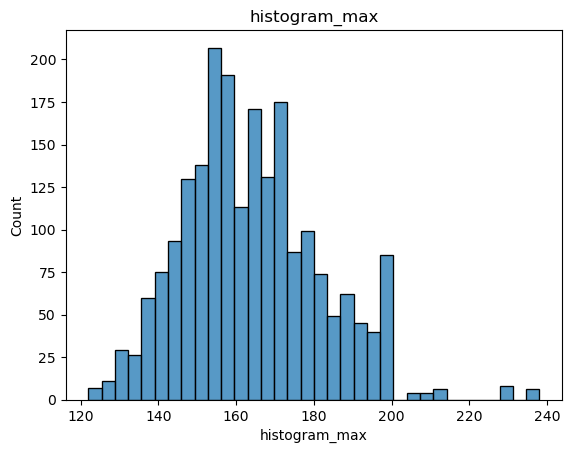

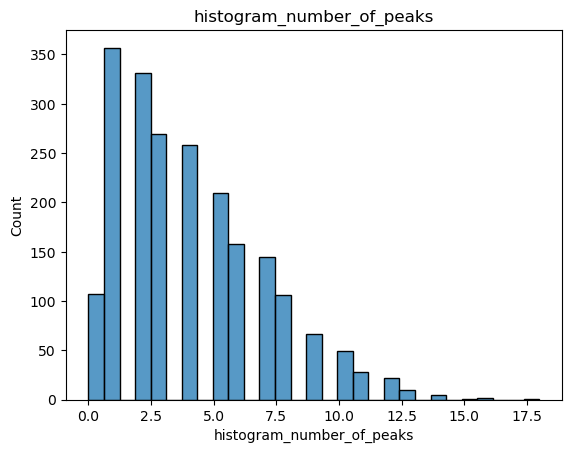

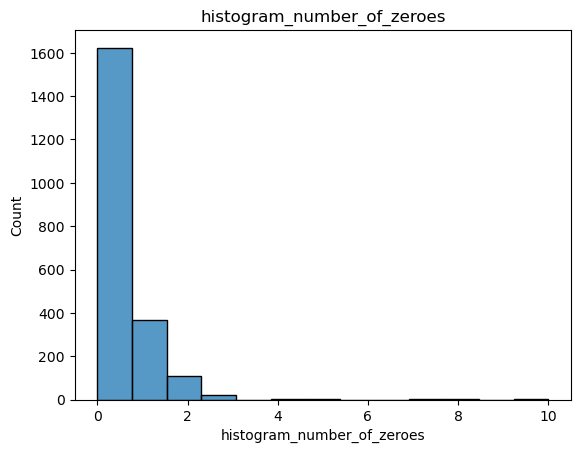

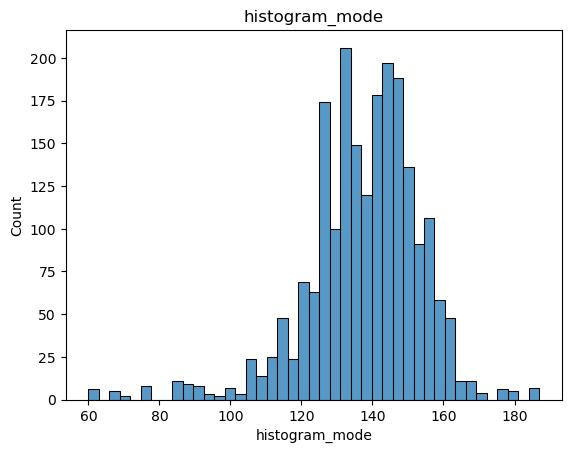

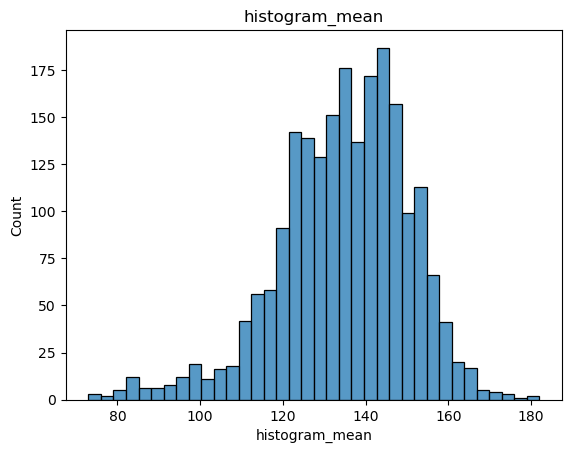

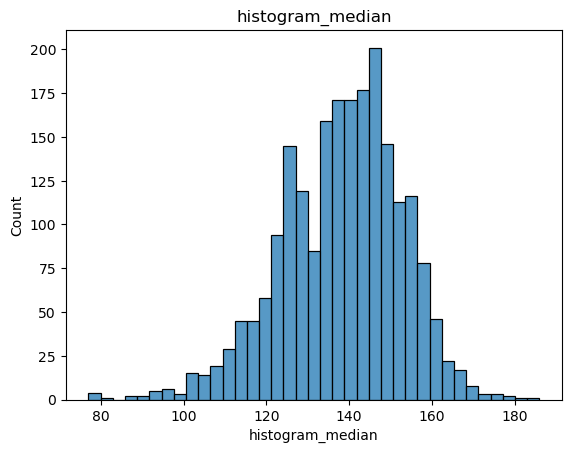

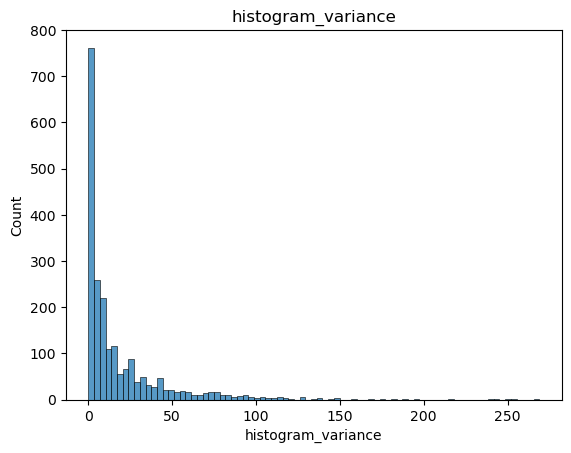

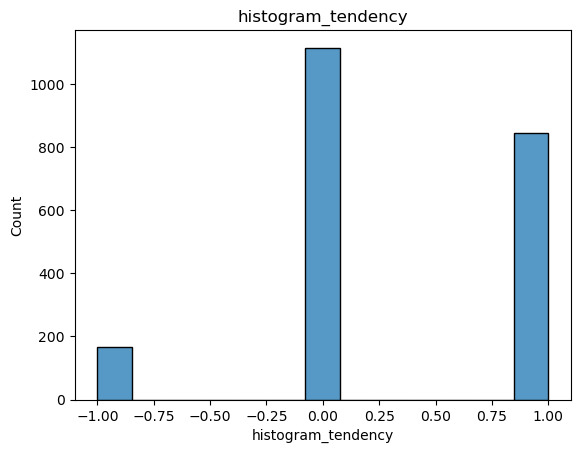

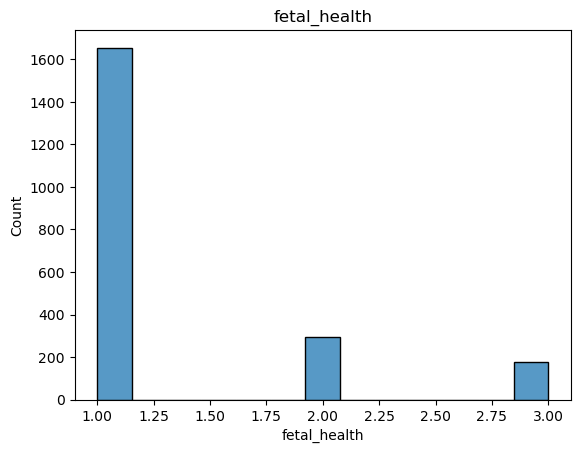

In [6]:
for col in data.columns:

    sns.histplot(data[col])
    plt.title(f'{col}')
    plt.show()

**Conclusions:**
- some of the data have a normal distribution and some have a skewed distribution,
- fetal_health, histogram_tendency columns contain categorical variables,
- data are unbalanced (most fetal assessments are positive),
- features have large differences in minimum and maximum values.

### Checking the correlation between features

In [7]:
corr_data = data.copy()
correlation_matrix = corr_data.corr()

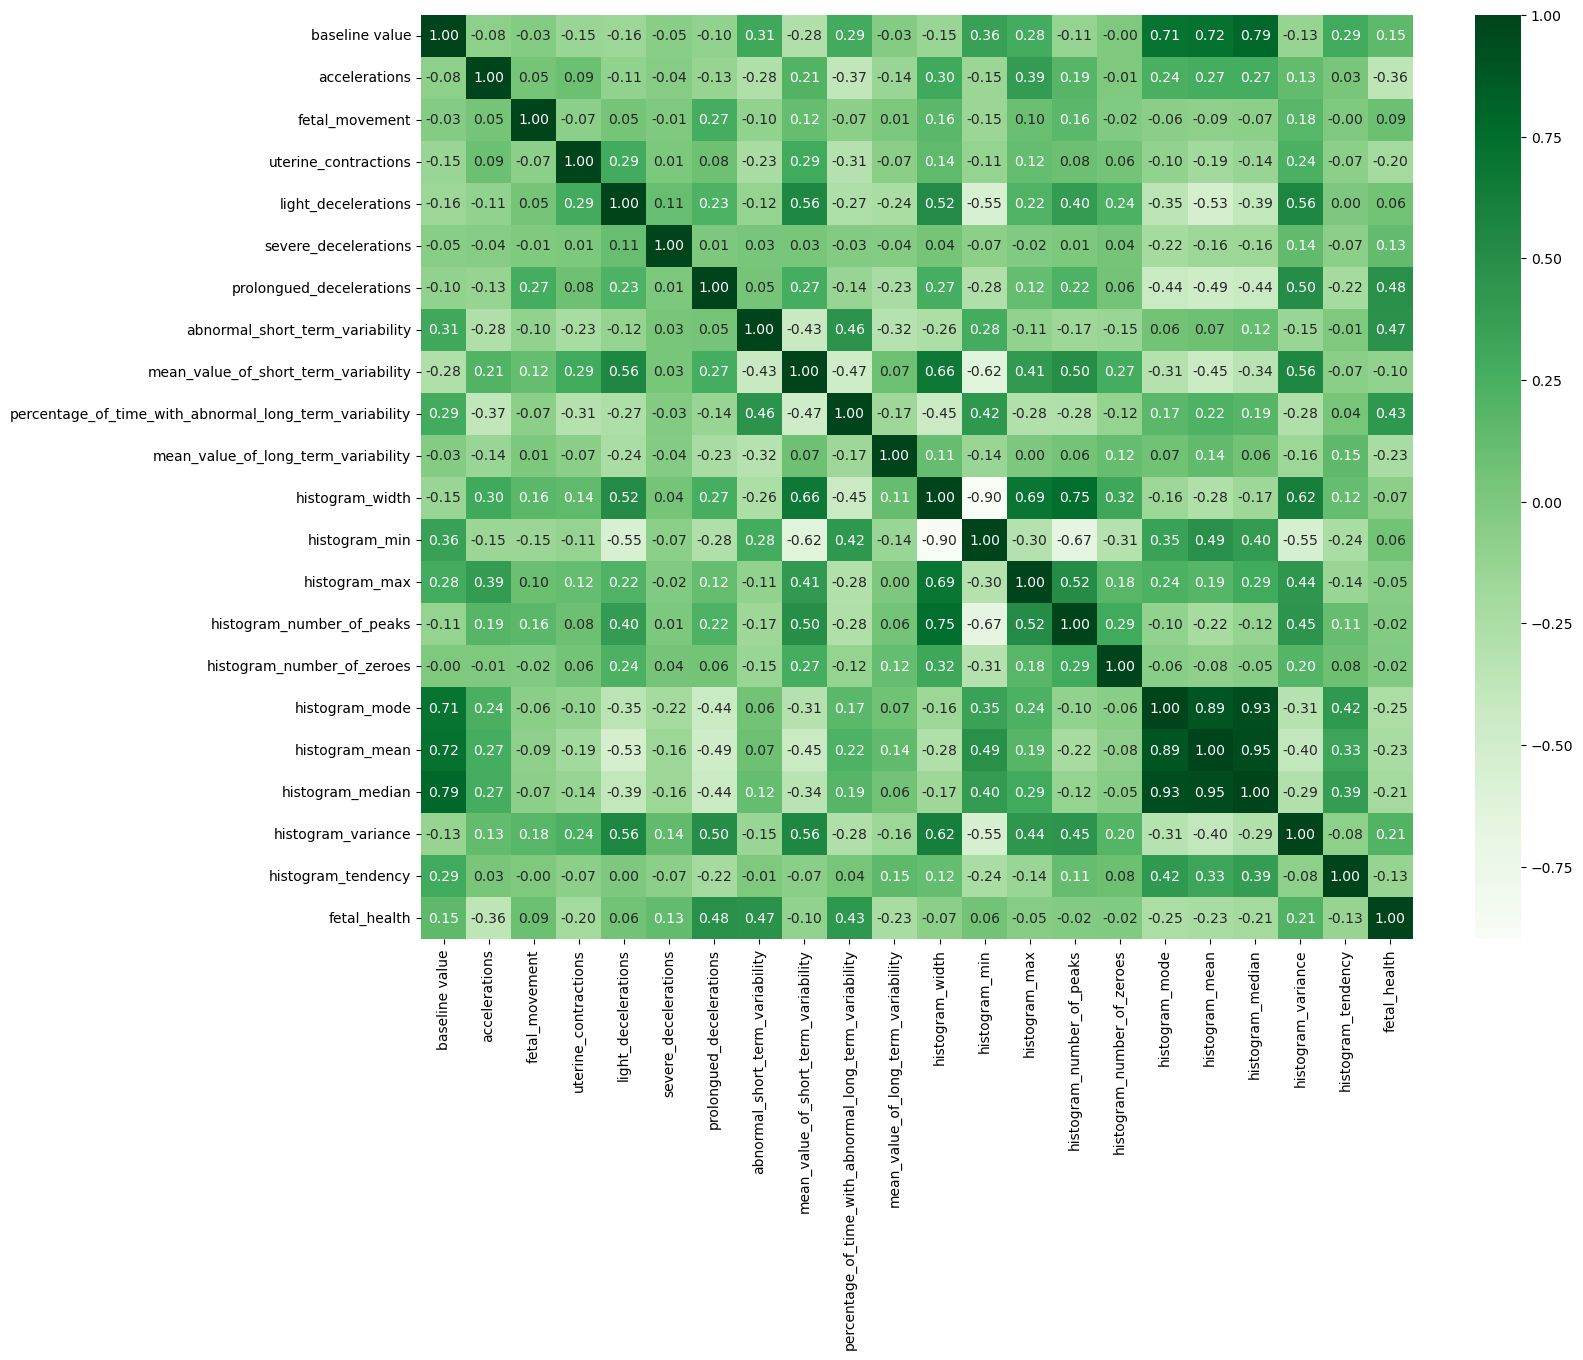

In [8]:
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap="Greens")
plt.show()

**Conclusions:**

Some features are highly positively and negatively correlated with each other.
Feature selection is required.

### Splitting the dataset into a training and test set

In [66]:
y = data[['fetal_health']]
features = data.drop(['fetal_health'], axis=1)
x = (features - features.mean()) / (features.std()) #standardized features


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [67]:
X_train.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
1719,-0.234112,1.506039,-0.203162,-0.124374,-0.300473,-0.057462,-0.268691,0.407721,0.189320,-0.535235,...,0.373606,-0.324067,0.277226,0.654983,-0.458336,0.827040,0.409749,0.408506,0.110151,1.112718
1376,-1.250285,0.729961,-0.203162,1.233367,0.712969,-0.057462,-0.268691,-1.337194,0.415759,-0.535235,...,0.039894,-0.662360,-1.004526,-0.023125,-0.458336,-0.515956,-0.872829,-0.835740,0.213679,1.112718
1454,1.493382,0.212576,-0.203162,0.215061,-0.638287,-0.057462,-0.268691,-0.406572,-0.489996,-0.100379,...,-0.601861,1.096762,0.500140,0.315929,-0.458336,1.193311,1.371683,1.376253,-0.545527,-0.524402
1805,0.985296,-0.822195,-0.203162,-1.142681,-0.638287,-0.057462,-0.268691,1.222015,-1.169312,-0.263450,...,-1.140935,1.333566,-0.280057,-1.040286,-0.458336,0.399723,0.602136,0.477631,-0.614546,-0.524402
1969,0.477209,0.988654,-0.203162,-0.124374,-0.638287,-0.057462,-0.268691,0.698541,-0.716435,-0.535235,...,-0.704542,1.062932,0.221498,-1.040286,-0.458336,0.643904,0.666265,0.615880,-0.441999,-0.524402


### Recursive feature elimination with cross validation and random forest classification

In [73]:
classifier = RandomForestClassifier() 
rfecv = RFECV(estimator=classifier, step=1, cv=5, scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train.values.ravel())

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 12
Best features : Index(['baseline value', 'accelerations', 'uterine_contractions',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_mode', 'histogram_mean', 'histogram_median'],
      dtype='object')
